In [1]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adadelta, Nadam
import fashionmnist_model as fmm_module
import pandas as pd
# Reload the module to apply any changes (useful during development)
import importlib
importlib.reload(fmm_module)


2024-02-23 20:52:44.966181: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<module 'fashionmnist_model' from '/Users/matthewkolawole/Desktop/school/classes/2nd semester/Advanced Deep Learning - AIGC-5500-IRB/midterm/fashionmnist_model.py'>

In [2]:
# Load the Fashion MNIST data using the utility function from the custom module
X_train, y_train, X_test, y_test = fmm_module.FMM.load_data()

# Normalizes and preprocesses the data
X_train_scaled, X_test_scaled = X_train / 255.0, X_test / 255.0
# Reshape data for CNN compatibility for; this will not affect dense models due to the Flatten layer
X_train = X_train.reshape((-1, 28, 28, 1))  # Adding a single color channel dimension
X_test = X_test.reshape((-1, 28, 28, 1))


In [3]:
# Defines hyperparameters for tuning
optimizers = {'RMSprop': RMSprop,
              'Adam': Adam,
             'Adadelta': Adadelta
              }
learning_rates = [0.001, 0.0005, 0.0001]
batch_sizes = [32, 64, 128]
n_splits = 5

# Setups k-fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=n_splits, shuffle=True)


In [4]:
results = []  # To store results for each hyperparameter combination

for opt_name, opt_class in optimizers.items():
    for lr in learning_rates:
        for batch_size in batch_sizes:
            best_train_accuracy = 0  # To store the best training accuracy across folds
            best_val_accuracy = 0   # To store the best validation accuracy across folds
            best_val_loss =0
            avg_val_loss = 0  # To accumulate average validation loss across folds

            for train_index, val_index in kf.split(X_train_scaled):
                # Prepares training and validation sets for the current fold
                x_train_fold, x_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                # Selects the model (i.e v1, v2, or v3 as created in the FMM class)
                model = fmm_module.FMM.create_model_v1()  # Using create_model_v1: 'this can be changed as needed or iterated over'

                # Compiles and train the model
                optimizer = opt_class(learning_rate=lr)
                history = fmm_module.FMM.compile_and_train(
                    model, x_train_fold, y_train_fold, optimizer, batch_size=batch_size, epochs=10)  # Reduced epochs for brevity

                # Evaluate model on training data
                train_loss, train_accuracy = model.evaluate(x_train_fold, y_train_fold, verbose=0)
                # Update best training accuracy if current fold's accuracy is higher
                if train_accuracy > best_train_accuracy:
                    best_train_accuracy = train_accuracy

                # Evaluate model on validation data
                val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
                # Update best validation accuracy if current fold's accuracy is higher
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
            # Updates average validation loss
                avg_val_loss += np.mean(history.history['val_loss']) / n_splits

            # Appends results for this combination
            results.append({'optimizer': opt_name, 'learning_rate': lr, 'batch_size': batch_size,
                            'best_train_accuracy': best_train_accuracy, 'best_val_accuracy': best_val_accuracy,
                            'best_val_loss': best_val_loss, 'avg_val_loss': avg_val_loss})


Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5361 - accuracy: 0.8057 - val_loss: 0.4317 - val_accuracy: 0.8423
Epoch 2/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3961 - accuracy: 0.8554 - val_loss: 0.3894 - val_accuracy: 0.8641
Epoch 3/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3642 - accuracy: 0.8677 - val_loss: 0.3620 - val_accuracy: 0.8678
Epoch 4/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3442 - accuracy: 0.8741 - val_loss: 0.4019 - val_accuracy: 0.8618
Epoch 5/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3322 - accuracy: 0.8805 - val_loss: 0.3945 - val_accuracy: 0.8652
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3197 - accuracy: 0.8829 - val_loss: 0.3836 - val_accuracy: 0.8631
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8890 - val_loss: 0.4045 - val_accuracy:

Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.8995 - val_loss: 0.3455 - val_accuracy: 0.8803
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2596 - accuracy: 0.9039 - val_loss: 0.3404 - val_accuracy: 0.8836
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2511 - accuracy: 0.9068 - val_loss: 0.3411 - val_accuracy: 0.8799
Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.5702 - accuracy: 0.7955 - val_loss: 0.4464 - val_accuracy: 0.8363
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8529 - val_loss: 0.4250 - val_accuracy: 0.8476
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8688 - val_loss: 0.3603 - val_accuracy: 0.8715
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8780 - val_loss: 0.3270 - val_accuracy: 0.8850
Epoch

300/300 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.8838 - val_loss: 0.3535 - val_accuracy: 0.8747
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.8891 - val_loss: 0.3711 - val_accuracy: 0.8678
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2836 - accuracy: 0.8925 - val_loss: 0.3202 - val_accuracy: 0.8836
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.8983 - val_loss: 0.3158 - val_accuracy: 0.8876
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.9041 - val_loss: 0.3339 - val_accuracy: 0.8822
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.9078 - val_loss: 0.3265 - val_accuracy: 0.8851
Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6350 - accuracy: 0.7776 - val_loss: 0.4656 - val_accuracy: 0.8289
Epoch 2/10
300/3

1200/1200 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8561 - val_loss: 0.4009 - val_accuracy: 0.8565
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3532 - accuracy: 0.8714 - val_loss: 0.4027 - val_accuracy: 0.8485
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3292 - accuracy: 0.8795 - val_loss: 0.3337 - val_accuracy: 0.8786
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3094 - accuracy: 0.8885 - val_loss: 0.3636 - val_accuracy: 0.8725
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2959 - accuracy: 0.8920 - val_loss: 0.3548 - val_accuracy: 0.8754
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2849 - accuracy: 0.8957 - val_loss: 0.3517 - val_accuracy: 0.8806
Epoch 8/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2748 - accuracy: 0.8986 - val_loss: 0.3387 - val_accuracy: 0.8858
Epo

600/600 [==============================] - 2s 3ms/step - loss: 0.2577 - accuracy: 0.9048 - val_loss: 0.3314 - val_accuracy: 0.8813
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2480 - accuracy: 0.9085 - val_loss: 0.3620 - val_accuracy: 0.8722
Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5869 - accuracy: 0.7942 - val_loss: 0.4605 - val_accuracy: 0.8323
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4148 - accuracy: 0.8513 - val_loss: 0.3872 - val_accuracy: 0.8585
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3659 - accuracy: 0.8677 - val_loss: 0.3693 - val_accuracy: 0.8634
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3354 - accuracy: 0.8769 - val_loss: 0.3645 - val_accuracy: 0.8645
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.8845 - val_loss: 0.3372 - val_accuracy: 0.8801
Epoch 6/10
600/6

Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3046 - accuracy: 0.8879 - val_loss: 0.3598 - val_accuracy: 0.8659
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2915 - accuracy: 0.8919 - val_loss: 0.3421 - val_accuracy: 0.8735
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2805 - accuracy: 0.8972 - val_loss: 0.3209 - val_accuracy: 0.8824
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2704 - accuracy: 0.9008 - val_loss: 0.3108 - val_accuracy: 0.8892
Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.6588 - accuracy: 0.7751 - val_loss: 0.4859 - val_accuracy: 0.8323
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4583 - accuracy: 0.8371 - val_loss: 0.4243 - val_accuracy: 0.8526
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8542 - val_loss: 0.3855 - val_accuracy: 0.8653
Epoch

1200/1200 [==============================] - 3s 3ms/step - loss: 0.3951 - accuracy: 0.8616 - val_loss: 0.3980 - val_accuracy: 0.8596
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3743 - accuracy: 0.8685 - val_loss: 0.3865 - val_accuracy: 0.8622
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3580 - accuracy: 0.8731 - val_loss: 0.3881 - val_accuracy: 0.8621
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3454 - accuracy: 0.8768 - val_loss: 0.3756 - val_accuracy: 0.8658
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3346 - accuracy: 0.8803 - val_loss: 0.3611 - val_accuracy: 0.8720
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3247 - accuracy: 0.8851 - val_loss: 0.3534 - val_accuracy: 0.8767
Epoch 10/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3148 - accuracy: 0.8888 - val_loss: 0.3533 - val_accuracy: 0.8760
Ep

300/300 [==============================] - 2s 5ms/step - loss: 0.9521 - accuracy: 0.7154 - val_loss: 0.6100 - val_accuracy: 0.7972
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5483 - accuracy: 0.8173 - val_loss: 0.5158 - val_accuracy: 0.8261
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4840 - accuracy: 0.8359 - val_loss: 0.4735 - val_accuracy: 0.8358
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4503 - accuracy: 0.8459 - val_loss: 0.4479 - val_accuracy: 0.8459
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4272 - accuracy: 0.8532 - val_loss: 0.4402 - val_accuracy: 0.8491
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4112 - accuracy: 0.8592 - val_loss: 0.4253 - val_accuracy: 0.8531
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3970 - accuracy: 0.8626 - val_loss: 0.4177 - val_accuracy: 0.8562
Epoch 8/10
300/30

1200/1200 [==============================] - 3s 3ms/step - loss: 0.2518 - accuracy: 0.9052 - val_loss: 0.3313 - val_accuracy: 0.8815
Epoch 9/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2411 - accuracy: 0.9091 - val_loss: 0.3435 - val_accuracy: 0.8817
Epoch 10/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2336 - accuracy: 0.9110 - val_loss: 0.3287 - val_accuracy: 0.8848
Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5240 - accuracy: 0.8147 - val_loss: 0.4458 - val_accuracy: 0.8392
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3871 - accuracy: 0.8596 - val_loss: 0.4010 - val_accuracy: 0.8568
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3447 - accuracy: 0.8724 - val_loss: 0.3764 - val_accuracy: 0.8629
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3212 - accuracy: 0.8820 - val_loss: 0.3746 - val_accuracy: 0.8589
Ep

600/600 [==============================] - 2s 3ms/step - loss: 0.3000 - accuracy: 0.8878 - val_loss: 0.3652 - val_accuracy: 0.8722
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2854 - accuracy: 0.8934 - val_loss: 0.3214 - val_accuracy: 0.8846
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2708 - accuracy: 0.8988 - val_loss: 0.3551 - val_accuracy: 0.8717
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2619 - accuracy: 0.9018 - val_loss: 0.3241 - val_accuracy: 0.8853
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2492 - accuracy: 0.9063 - val_loss: 0.3484 - val_accuracy: 0.8757
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2350 - accuracy: 0.9123 - val_loss: 0.3364 - val_accuracy: 0.8850
Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5440 - accuracy: 0.8073 - val_loss: 0.5242 - val_accuracy: 0.8019
Epoch 2/10
600/6

Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3629 - accuracy: 0.8703 - val_loss: 0.3648 - val_accuracy: 0.8696
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8781 - val_loss: 0.3769 - val_accuracy: 0.8679
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3108 - accuracy: 0.8858 - val_loss: 0.3366 - val_accuracy: 0.8806
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2910 - accuracy: 0.8915 - val_loss: 0.3462 - val_accuracy: 0.8764
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2790 - accuracy: 0.8961 - val_loss: 0.3472 - val_accuracy: 0.8763
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2678 - accuracy: 0.9010 - val_loss: 0.3283 - val_accuracy: 0.8811
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2511 - accuracy: 0.9067 - val_loss: 0.3363 - val_accuracy: 0.8801
Epoch 

1200/1200 [==============================] - 3s 3ms/step - loss: 0.2299 - accuracy: 0.9128 - val_loss: 0.3189 - val_accuracy: 0.8873
Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5381 - accuracy: 0.8133 - val_loss: 0.4405 - val_accuracy: 0.8379
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3916 - accuracy: 0.8595 - val_loss: 0.3991 - val_accuracy: 0.8573
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3521 - accuracy: 0.8692 - val_loss: 0.3650 - val_accuracy: 0.8707
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3202 - accuracy: 0.8830 - val_loss: 0.3541 - val_accuracy: 0.8714
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3016 - accuracy: 0.8887 - val_loss: 0.3414 - val_accuracy: 0.8723
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2837 - accuracy: 0.8951 - val_loss: 0.3379 - val_accuracy: 0.8767
Epo

600/600 [==============================] - 2s 3ms/step - loss: 0.2804 - accuracy: 0.8965 - val_loss: 0.3465 - val_accuracy: 0.8773
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2678 - accuracy: 0.9001 - val_loss: 0.3325 - val_accuracy: 0.8773
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2522 - accuracy: 0.9071 - val_loss: 0.3317 - val_accuracy: 0.8801
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2443 - accuracy: 0.9097 - val_loss: 0.3188 - val_accuracy: 0.8863
Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.5725 - accuracy: 0.8040 - val_loss: 0.4439 - val_accuracy: 0.8385
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4055 - accuracy: 0.8556 - val_loss: 0.4100 - val_accuracy: 0.8569
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3607 - accuracy: 0.8704 - val_loss: 0.3600 - val_accuracy: 0.8731
Epoch 4/10
600/6

Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3304 - accuracy: 0.8826 - val_loss: 0.3423 - val_accuracy: 0.8758
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3131 - accuracy: 0.8863 - val_loss: 0.3388 - val_accuracy: 0.8786
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2980 - accuracy: 0.8911 - val_loss: 0.3331 - val_accuracy: 0.8792
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.8976 - val_loss: 0.3276 - val_accuracy: 0.8846
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2762 - accuracy: 0.9006 - val_loss: 0.3442 - val_accuracy: 0.8742
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2630 - accuracy: 0.9042 - val_loss: 0.3152 - val_accuracy: 0.8881
Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7007 - accuracy: 0.7741 - val_loss: 0.4915 - val_accuracy: 0.8314
Epo

Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5005 - accuracy: 0.8317 - val_loss: 0.4720 - val_accuracy: 0.8418
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4429 - accuracy: 0.8479 - val_loss: 0.4366 - val_accuracy: 0.8493
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4109 - accuracy: 0.8577 - val_loss: 0.4122 - val_accuracy: 0.8587
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3869 - accuracy: 0.8658 - val_loss: 0.4060 - val_accuracy: 0.8590
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3710 - accuracy: 0.8707 - val_loss: 0.3869 - val_accuracy: 0.8671
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3571 - accuracy: 0.8742 - val_loss: 0.3723 - val_accuracy: 0.8704
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3441 - accuracy: 0.8773 - val_loss: 0.3671 - val_accuracy: 0.8721
Epoch 

300/300 [==============================] - 1s 4ms/step - loss: 0.3681 - accuracy: 0.8726 - val_loss: 0.3953 - val_accuracy: 0.8644
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3599 - accuracy: 0.8753 - val_loss: 0.3833 - val_accuracy: 0.8658
Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.9784 - accuracy: 0.7006 - val_loss: 0.6141 - val_accuracy: 0.7975
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5452 - accuracy: 0.8204 - val_loss: 0.5109 - val_accuracy: 0.8257
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4737 - accuracy: 0.8383 - val_loss: 0.4764 - val_accuracy: 0.8322
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4368 - accuracy: 0.8497 - val_loss: 0.4407 - val_accuracy: 0.8477
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8565 - val_loss: 0.4217 - val_accuracy: 0.8542
Epoch 6/10
300/3

1200/1200 [==============================] - 4s 3ms/step - loss: 1.2988 - accuracy: 0.6609 - val_loss: 1.2356 - val_accuracy: 0.6746
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.2040 - accuracy: 0.6697 - val_loss: 1.1501 - val_accuracy: 0.6845
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.1265 - accuracy: 0.6791 - val_loss: 1.0803 - val_accuracy: 0.6943
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0642 - accuracy: 0.6881 - val_loss: 1.0247 - val_accuracy: 0.7045
Epoch 10/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0135 - accuracy: 0.6963 - val_loss: 0.9786 - val_accuracy: 0.7109
Epoch 1/10
1200/1200 [==============================] - 5s 3ms/step - loss: 2.1796 - accuracy: 0.1665 - val_loss: 2.0204 - val_accuracy: 0.3812
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.9030 - accuracy: 0.4958 - val_loss: 1.7888 - val_accuracy: 0.5655
Ep

600/600 [==============================] - 2s 3ms/step - loss: 1.8830 - accuracy: 0.4552 - val_loss: 1.8138 - val_accuracy: 0.5122
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 1.7565 - accuracy: 0.5519 - val_loss: 1.6946 - val_accuracy: 0.5845
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 1.6450 - accuracy: 0.5993 - val_loss: 1.5879 - val_accuracy: 0.6208
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 1.5438 - accuracy: 0.6247 - val_loss: 1.4900 - val_accuracy: 0.6386
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 1.4522 - accuracy: 0.6406 - val_loss: 1.4027 - val_accuracy: 0.6538
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 1.3711 - accuracy: 0.6513 - val_loss: 1.3258 - val_accuracy: 0.6607
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 1.2995 - accuracy: 0.6576 - val_loss: 1.2580 - val_accuracy: 0.6691
Epoch 10/10
600/6

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 2.3220 - accuracy: 0.0639 - val_loss: 2.2538 - val_accuracy: 0.0900
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 2.1903 - accuracy: 0.1542 - val_loss: 2.1288 - val_accuracy: 0.2307
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 2.0729 - accuracy: 0.3046 - val_loss: 2.0165 - val_accuracy: 0.3818
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 1.9673 - accuracy: 0.4291 - val_loss: 1.9152 - val_accuracy: 0.4794
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 1.8708 - accuracy: 0.5061 - val_loss: 1.8217 - val_accuracy: 0.5424
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 1.7815 - accuracy: 0.5570 - val_loss: 1.7349 - val_accuracy: 0.5851
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 1.6982 - accuracy: 0.5953 - val_loss: 1.6538 - val_accuracy: 0.6147
Epoch 

1200/1200 [==============================] - 4s 3ms/step - loss: 1.4895 - accuracy: 0.6307 - val_loss: 1.4448 - val_accuracy: 0.6426
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/step - loss: 1.4198 - accuracy: 0.6415 - val_loss: 1.3785 - val_accuracy: 0.6520
Epoch 10/10
1200/1200 [==============================] - 4s 4ms/step - loss: 1.3576 - accuracy: 0.6487 - val_loss: 1.3197 - val_accuracy: 0.6592
Epoch 1/10
1200/1200 [==============================] - 5s 3ms/step - loss: 2.3132 - accuracy: 0.1214 - val_loss: 2.2244 - val_accuracy: 0.1632
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 2.1497 - accuracy: 0.2176 - val_loss: 2.0811 - val_accuracy: 0.2663
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0197 - accuracy: 0.3253 - val_loss: 1.9591 - val_accuracy: 0.3989
Epoch 4/10
1200/1200 [==============================] - 4s 4ms/step - loss: 1.9071 - accuracy: 0.4623 - val_loss: 1.8514 - val_accuracy: 0.5257
Ep

600/600 [==============================] - 2s 4ms/step - loss: 1.9553 - accuracy: 0.4199 - val_loss: 1.9167 - val_accuracy: 0.4555
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 1.8900 - accuracy: 0.4647 - val_loss: 1.8534 - val_accuracy: 0.4894
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 1.8299 - accuracy: 0.4954 - val_loss: 1.7950 - val_accuracy: 0.5149
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 1.7743 - accuracy: 0.5170 - val_loss: 1.7408 - val_accuracy: 0.5309
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 1.7225 - accuracy: 0.5328 - val_loss: 1.6903 - val_accuracy: 0.5434
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 1.6747 - accuracy: 0.5434 - val_loss: 1.6440 - val_accuracy: 0.5523
Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 2.3823 - accuracy: 0.0529 - val_loss: 2.3434 - val_accuracy: 0.0640
Epoch 2/10
300/3

Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.2829 - accuracy: 0.1862 - val_loss: 2.2569 - val_accuracy: 0.2030
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 2.2442 - accuracy: 0.2187 - val_loss: 2.2192 - val_accuracy: 0.2377
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.2082 - accuracy: 0.2482 - val_loss: 2.1842 - val_accuracy: 0.2658
Epoch 6/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.1751 - accuracy: 0.2745 - val_loss: 2.1519 - val_accuracy: 0.2927
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.1442 - accuracy: 0.2978 - val_loss: 2.1218 - val_accuracy: 0.3169
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.1152 - accuracy: 0.3236 - val_loss: 2.0933 - val_accuracy: 0.3409
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/step - loss: 2.0875 - accuracy: 0.3486 - val_loss: 2.0658 - val_accuracy:

Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 2.1712 - accuracy: 0.1840 - val_loss: 2.1529 - val_accuracy: 0.1937
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 2.4037 - accuracy: 0.0532 - val_loss: 2.3924 - val_accuracy: 0.0555
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3710 - accuracy: 0.0560 - val_loss: 2.3596 - val_accuracy: 0.0591
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 2.3397 - accuracy: 0.0638 - val_loss: 2.3279 - val_accuracy: 0.0705
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 2.3094 - accuracy: 0.0766 - val_loss: 2.2974 - val_accuracy: 0.0877
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 2.2805 - accuracy: 0.0952 - val_loss: 2.2685 - val_accuracy: 0.1064
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 2.2531 - accuracy: 0.1161 - val_loss: 2.2411 - val_accuracy: 0.1255
Epoch

300/300 [==============================] - 1s 5ms/step - loss: 2.2490 - accuracy: 0.1664 - val_loss: 2.2366 - val_accuracy: 0.1768
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 2.2339 - accuracy: 0.1837 - val_loss: 2.2216 - val_accuracy: 0.1947
Epoch 9/10
300/300 [==============================] - 1s 5ms/step - loss: 2.2192 - accuracy: 0.2005 - val_loss: 2.2070 - val_accuracy: 0.2092
Epoch 10/10
300/300 [==============================] - 1s 5ms/step - loss: 2.2049 - accuracy: 0.2160 - val_loss: 2.1927 - val_accuracy: 0.2248
Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 2.4171 - accuracy: 0.0969 - val_loss: 2.4107 - val_accuracy: 0.0984
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 2.3958 - accuracy: 0.1013 - val_loss: 2.3886 - val_accuracy: 0.1041
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 2.3737 - accuracy: 0.1071 - val_loss: 2.3659 - val_accuracy: 0.1116
Epoch 4/10
300/3

In [5]:
# Converts the results list to a pandas DataFrame for easy tabular display
results_df = pd.DataFrame(results)

# Sorts the DataFrame by average validation loss to see the best performers at the top
results_df.sort_values(by='avg_val_loss', ascending=True, inplace=True)

# Identifies the best parameters based on the lowest average validation loss
best_params = results_df.iloc[results_df['avg_val_loss'].argmin()]

# Displays the best hyperparameters in a tabular format
print("Final Best Hyperparameters for loss based evaluation:")
print(best_params[['optimizer', 'learning_rate', 'batch_size', 'avg_val_loss']].to_string(index=False))

# Displays summary of all combinations in a tabular format
print("\nSummary of All Combinations for loss based evaluation:")
print(results_df.to_string(index=False))


Final Best Hyperparameters for loss based evaluation:
     Adam
   0.0005
       32
 0.351197

Summary of All Combinations for loss based evaluation:
optimizer  learning_rate  batch_size  best_train_accuracy  best_val_accuracy  best_val_loss  avg_val_loss
     Adam         0.0005          32             0.918813           0.893750              0      0.351197
     Adam         0.0010          32             0.914708           0.889167              0      0.356170
     Adam         0.0010          64             0.914312           0.888750              0      0.356659
     Adam         0.0010         128             0.906542           0.886833              0      0.358252
     Adam         0.0005          64             0.914208           0.892917              0      0.361370
  RMSprop         0.0005          64             0.909542           0.887833              0      0.364148
     Adam         0.0005         128             0.909646           0.890833              0      0.368351
  

In [6]:
# Converts the results list to a pandas DataFrame for easy tabular display
results_df = pd.DataFrame(results)

# Identifies the best parameters based on the highest validation accuracy across all folds
best_params = results_df.iloc[results_df['best_val_accuracy'].argmax()]

# Displays the best hyperparameters in a tabular format
print("Final Best Hyperparameters for accuracy-based evaluation:")
print(best_params[['optimizer', 'learning_rate', 'batch_size', 'best_train_accuracy', 'best_val_accuracy','best_val_loss']].to_string(index=False))

# Displays summary of all combinations in a tabular format
print("\nSummary of All Combinations:")
print(results_df.to_string(index=False))

Final Best Hyperparameters for accuracy-based evaluation:
     Adam
   0.0005
       32
 0.918813
  0.89375
        0

Summary of All Combinations:
optimizer  learning_rate  batch_size  best_train_accuracy  best_val_accuracy  best_val_loss  avg_val_loss
  RMSprop         0.0010          32             0.901854           0.882500              0      0.402310
  RMSprop         0.0010          64             0.909646           0.891000              0      0.370997
  RMSprop         0.0010         128             0.912292           0.892000              0      0.368616
  RMSprop         0.0005          32             0.909000           0.888500              0      0.370481
  RMSprop         0.0005          64             0.909542           0.887833              0      0.364148
  RMSprop         0.0005         128             0.909854           0.888417              0      0.382520
  RMSprop         0.0001          32             0.893771           0.881417              0      0.398232
  RM

In [10]:
# Find the index of the combination with the highest validation accuracy
best_index = np.argmax([result['best_val_accuracy'] for result in results])

# Get the corresponding combination of hyperparameters
best_params = results[best_index]

# Print the hyperparameters along with the highest validation accuracy
print("optimal Hyperparameters based on Highest Validation Accuracy:")
print(f"Optimizer: {best_params['optimizer']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Validation Accuracy: {best_params['best_val_accuracy']:.4f}")


optimal Hyperparameters based on Highest Validation Accuracy:
Optimizer: Adam
Learning Rate: 0.0005
Batch Size: 32
Validation Accuracy: 0.8938


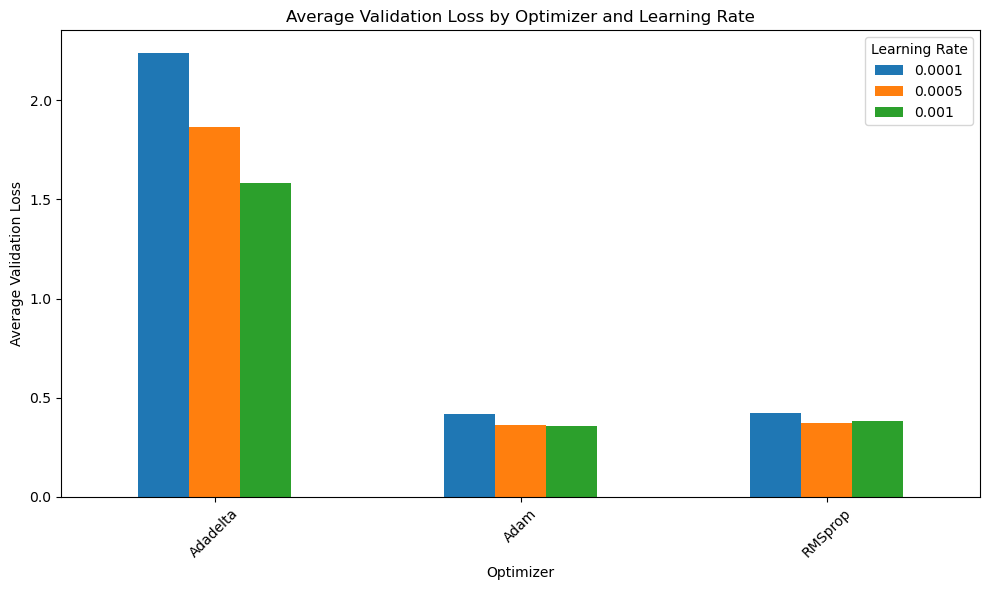

In [11]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# using a pivot table to prepare data for plotting
pivot_df = results_df.pivot_table(values='avg_val_loss', index='optimizer', columns='learning_rate', aggfunc='mean')

pivot_df.plot(kind='bar', ax=ax)
ax.set_title('Average Validation Loss by Optimizer and Learning Rate')
ax.set_ylabel('Average Validation Loss')
ax.set_xlabel('Optimizer')
plt.legend(title='Learning Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


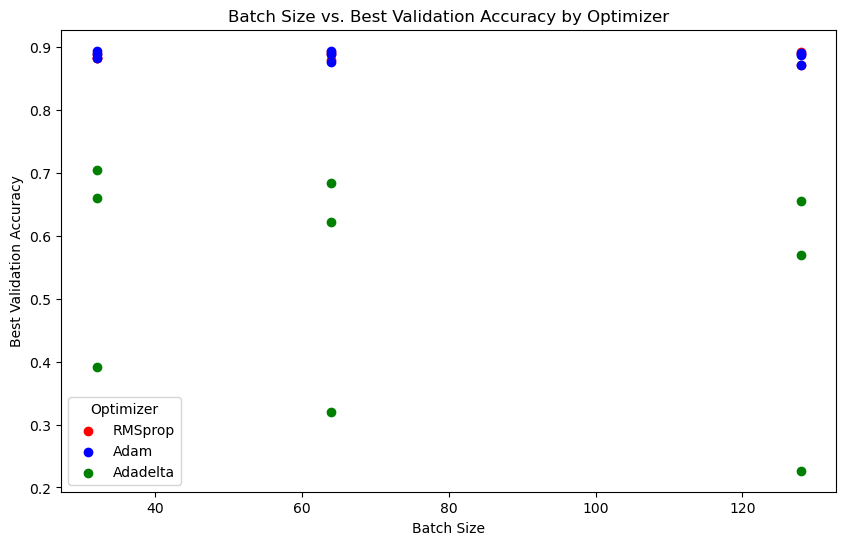

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'RMSprop': 'red', 'Adam': 'blue', 'Adadelta': 'green'}
for optimizer in results_df['optimizer'].unique():
    subset = results_df[results_df['optimizer'] == optimizer]
    ax.scatter(subset['batch_size'], subset['best_val_accuracy'], color=colors[optimizer], label=optimizer)

ax.set_title('Batch Size vs. Best Validation Accuracy by Optimizer')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Best Validation Accuracy')
plt.legend(title='Optimizer')
plt.show()


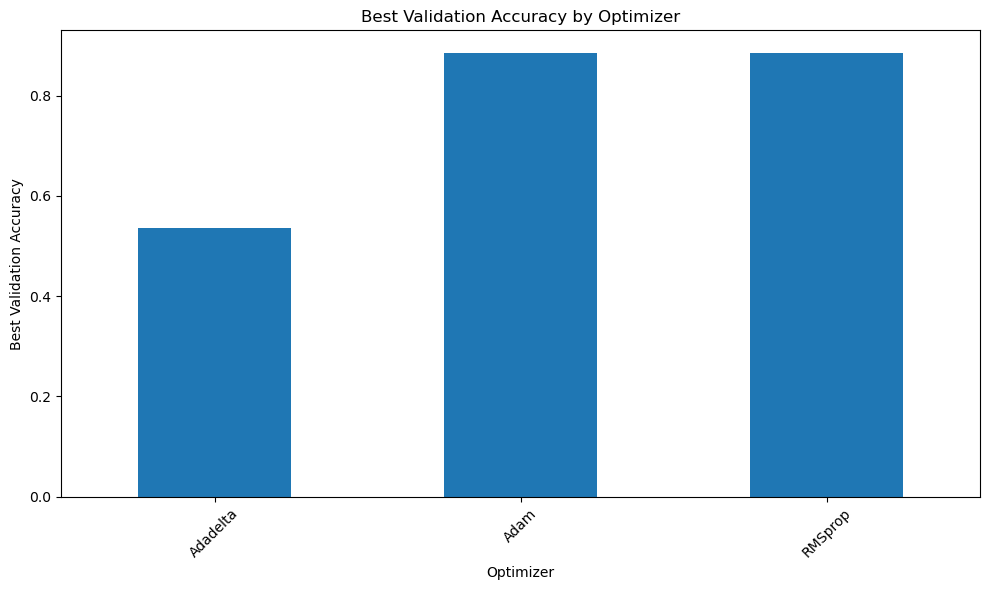

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'results' is your DataFrame
# Group by optimizer and calculate mean best_val_accuracy for simplicity
accuracy_summary = results_df.groupby(['optimizer']).agg({'best_val_accuracy':'mean'}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
accuracy_summary.plot(kind='bar', x='optimizer', y='best_val_accuracy', ax=ax, legend=False)
ax.set_title('Best Validation Accuracy by Optimizer')
ax.set_ylabel('Best Validation Accuracy')
ax.set_xlabel('Optimizer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
